<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/heatmap_own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

In [2]:
path = untar_data(URLs.PETS)
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [3]:
path_img = path/'images'
path_img.ls()[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_143.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_195.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_183.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_102.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_177.jpg')]

In [4]:
temp_label = path_img.ls()[0]
temp_label.stem.rsplit('_', 1)[0]

'american_pit_bull_terrier'

In [0]:
def get_label(img_path): return img_path.stem.rsplit('_', 1)[0]

In [0]:
src = ImageList.from_folder(path_img).split_by_rand_pct(0.2, seed = 2).label_from_func(get_label)

In [0]:
'''
do_flip: bool=True, flip_vert: bool=False, max_rotate: float=10.0, max_zoom: float=1.1, 
max_lighting: float=0.2, max_warp: float=0.2, p_affine: float=0.75, p_lighting: float=0.75, 
xtra_tfms: Union[Collection[fastai.vision.image.Transform], NoneType]=None) -> Collection[fastai.vision.image.Transform]
'''
tfms = get_transforms(do_flip=True, flip_vert=False, max_rotate=10.0, max_zoom=1.2, 
                      max_lighting=0.2, max_warp=0.2, p_affine=1.0, p_lighting=1.0)

In [8]:
img = open_image(path_img.ls()[0])
img.shape 

torch.Size([3, 300, 290])

In [21]:
def get_data(img_size = 224, bs = 64, padding_mode = 'reflection'):
  return src.transform(tfms, size = img_size, padding_mode = padding_mode).databunch(bs = bs).normalize(imagenet_stats)

data = get_data()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


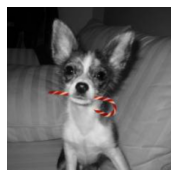

In [34]:
img, categ = data.valid_ds[316]
img.show()

In [0]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate, bn_final=True)
learn.lr_find()

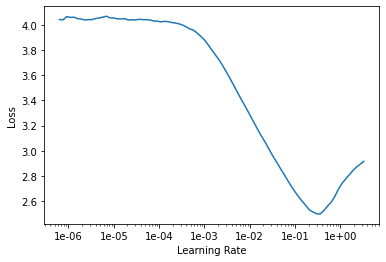

In [36]:
learn.recorder.plot()

In [0]:
learn_bn = cnn_learner(data, models.resnet34, metrics = error_rate, bn_final = True)
learn_bn.fit_one_cycle(2, slice(1e-02))

In [0]:
learn.fit_one_cycle(2, slice(1e-02))

epoch,train_loss,valid_loss,error_rate,time


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


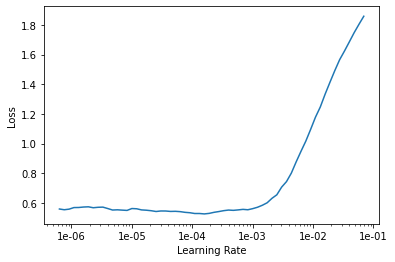

In [40]:
learn.save('stage-1')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(2, slice(1e-05, 1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.564534,0.290173,0.085250,02:00
1,0.452446,0.252386,0.064276,01:59


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [42]:
learn.save('stage-2')
data = get_data(img_size = 352)
learn.data = data
learn.fit_one_cycle(2, slice(1e-05, 1e-03))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


epoch,train_loss,valid_loss,error_rate,time
0,0.450335,0.260340,0.069689,03:39
1,0.367654,0.190925,0.047361,03:40


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [0]:
trc = tensor([[1, 1, 1], [-5/3, -5/3, 1], [0, -5/3, 1]]).expand(1, 3, 3, 3)/6
blc = tensor([[1, -5/3, 0], [1, -5/3, -5/3], [1, 1, 1]]).expand(1, 3, 3, 3)/6

Category 34

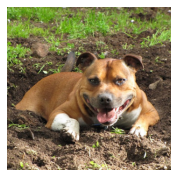

In [55]:
idx = 3
x, y = data.valid_ds[idx]
x.show()
data.valid_ds.y[idx]

In [57]:
t = x.data; t.shape, t[None].shape

(torch.Size([3, 352, 352]), torch.Size([1, 3, 352, 352]))

In [0]:
channel_trc = F.conv2d(t[None], trc)
channel_blc = F.conv2d(t[None], blc)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f78875e8f60>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f788756f240>)

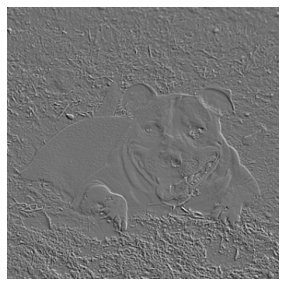

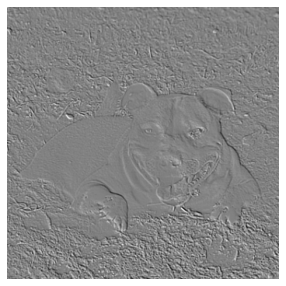

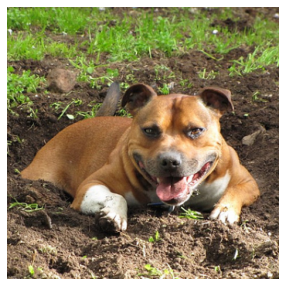

In [68]:
show_image(channel_trc[0], figsize=(5, 5)), show_image(channel_blc[0], figsize=(5, 5)), show_image(t, figsize=(5, 5))

In [73]:
xb, _ = data.one_item(x); xb.shape, t[None].shape

(torch.Size([1, 3, 352, 352]), torch.Size([1, 3, 352, 352]))

In [88]:
xb.shape, t[None].shape

(torch.Size([1, 3, 352, 352]), torch.Size([1, 3, 352, 352]))

In [95]:
m = learn.model.eval()
m

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
inp = t[None].cuda()

In [98]:
!pip install ipdb

  Created wheel for ipdb: filename=ipdb-0.13.2-cp36-none-any.whl size=10522 sha256=9fd807cb9b965ecc2885a660e176e23d3d2c8a92905d28a5e300bad1ced238ed
  Stored in directory: /root/.cache/pip/wheels/60/c2/15/793365e3c9318c46ba914263740d90f1fe67f544b979141ce4
Successfully built ipdb


In [0]:
def hooked_backward(cat = y):

  with hook_output(m[0]) as hook_a:
    with hook_output(m[0], grad = True) as hook_g:
      preds = m(inp)
      preds[0, int(cat)].backward()
  return hook_a, hook_g

In [0]:
hook_a, hook_g = hooked_backward(cat = y)

In [111]:
acts = hook_a.stored[0]; acts.shape

torch.Size([512, 11, 11])

In [113]:
acts_mean = acts.mean(0)
acts_mean.shape

torch.Size([11, 11])

In [114]:
acts_mean

tensor([[0.7233, 0.4770, 0.3806, 0.4266, 0.4045, 0.4184, 0.4518, 0.4501, 0.4249,
         0.4199, 0.4548],
        [0.5340, 0.4504, 0.3780, 0.4305, 0.4484, 0.4708, 0.4942, 0.4895, 0.4158,
         0.4536, 0.4512],
        [0.4588, 0.4097, 0.3090, 0.4220, 0.5680, 0.7180, 0.7560, 0.7219, 0.5800,
         0.5004, 0.4292],
        [0.4201, 0.4258, 0.4726, 0.7440, 1.0675, 1.3771, 1.3643, 1.3259, 1.1598,
         0.7846, 0.4918],
        [0.4147, 0.5645, 0.7832, 1.2100, 1.5735, 1.8789, 1.9850, 1.9497, 1.6575,
         1.1591, 0.6595],
        [0.4913, 0.7277, 1.0422, 1.4598, 1.8323, 2.1600, 2.3307, 2.3090, 1.9556,
         1.4613, 0.9153],
        [0.4991, 0.9142, 1.1191, 1.5176, 1.8279, 2.0876, 2.2614, 2.2098, 1.9259,
         1.6496, 1.0209],
        [0.5517, 0.8376, 0.9967, 1.2517, 1.4690, 1.6725, 1.7476, 1.7006, 1.6269,
         1.4987, 0.9929],
        [0.5087, 0.6249, 0.6632, 0.8543, 1.0266, 1.1116, 1.1502, 1.1299, 1.0794,
         1.0229, 0.7011],
        [0.5454, 0.5314, 0.4367, 0.47

In [0]:
xb, _ = data.one_item(x)
xb_im = Image(data.denorm(xb[0]))
xb = xb.cuda()

In [0]:
def show_heatmap(hm):
    _,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
              interpolation='bilinear', cmap='magma');

In [138]:
acts_mean

tensor([[0.7233, 0.4770, 0.3806, 0.4266, 0.4045, 0.4184, 0.4518, 0.4501, 0.4249,
         0.4199, 0.4548],
        [0.5340, 0.4504, 0.3780, 0.4305, 0.4484, 0.4708, 0.4942, 0.4895, 0.4158,
         0.4536, 0.4512],
        [0.4588, 0.4097, 0.3090, 0.4220, 0.5680, 0.7180, 0.7560, 0.7219, 0.5800,
         0.5004, 0.4292],
        [0.4201, 0.4258, 0.4726, 0.7440, 1.0675, 1.3771, 1.3643, 1.3259, 1.1598,
         0.7846, 0.4918],
        [0.4147, 0.5645, 0.7832, 1.2100, 1.5735, 1.8789, 1.9850, 1.9497, 1.6575,
         1.1591, 0.6595],
        [0.4913, 0.7277, 1.0422, 1.4598, 1.8323, 2.1600, 2.3307, 2.3090, 1.9556,
         1.4613, 0.9153],
        [0.4991, 0.9142, 1.1191, 1.5176, 1.8279, 2.0876, 2.2614, 2.2098, 1.9259,
         1.6496, 1.0209],
        [0.5517, 0.8376, 0.9967, 1.2517, 1.4690, 1.6725, 1.7476, 1.7006, 1.6269,
         1.4987, 0.9929],
        [0.5087, 0.6249, 0.6632, 0.8543, 1.0266, 1.1116, 1.1502, 1.1299, 1.0794,
         1.0229, 0.7011],
        [0.5454, 0.5314, 0.4367, 0.47

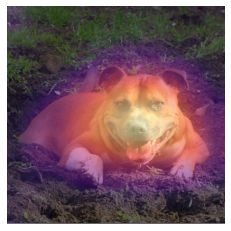

In [139]:
show_heatmap(acts_mean.cpu())